In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!mkdir -q {HOME}/datasets
%cd {HOME}/datasets

mkdir: invalid option -- 'q'
Try 'mkdir --help' for more information.
[Errno 2] No such file or directory: '/content/datasets'
/content


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="jDVTvJHMWuHarRig6gsX")
project = rf.workspace("sakamoto96").project("test_elephant_detection-8vhgg")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test_elephant_detection-1 in yolov8:: 100%|██████████| 726/726 [00:00<00:00, 3429.10it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import ultralytics
from ultralytics import YOLO
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/test_elephant_detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

def display_image(image_path, figsize=(10, 10)):
  if not os.path.exists(image_path):
    print(f"Image not found at path: {image_path}")
    return

  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=figsize)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

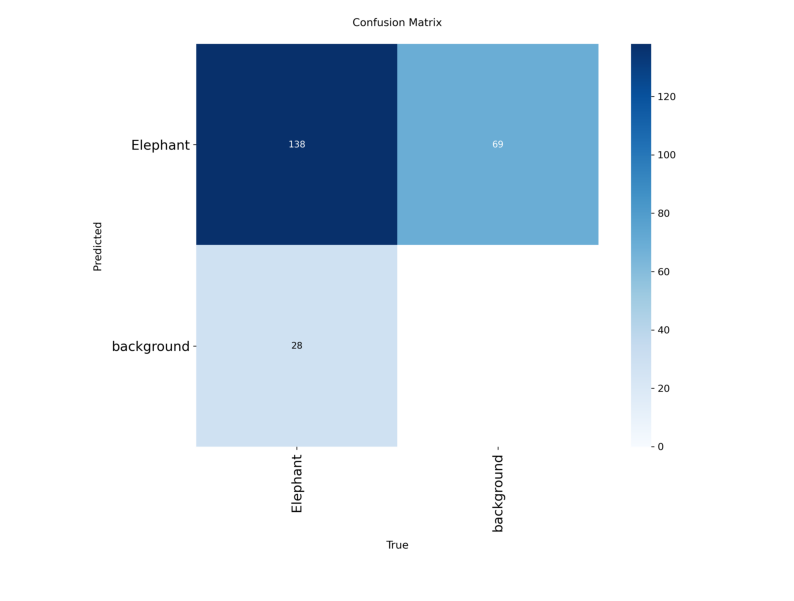

In [ ]:
# เส้นทางไฟล์ภาพ confusion_matrix
image_path = f"{HOME}/runs/detect/train/confusion_matrix.png"
# เรียกใช้ฟังก์ชันแสดงภาพ
display_image(image_path)

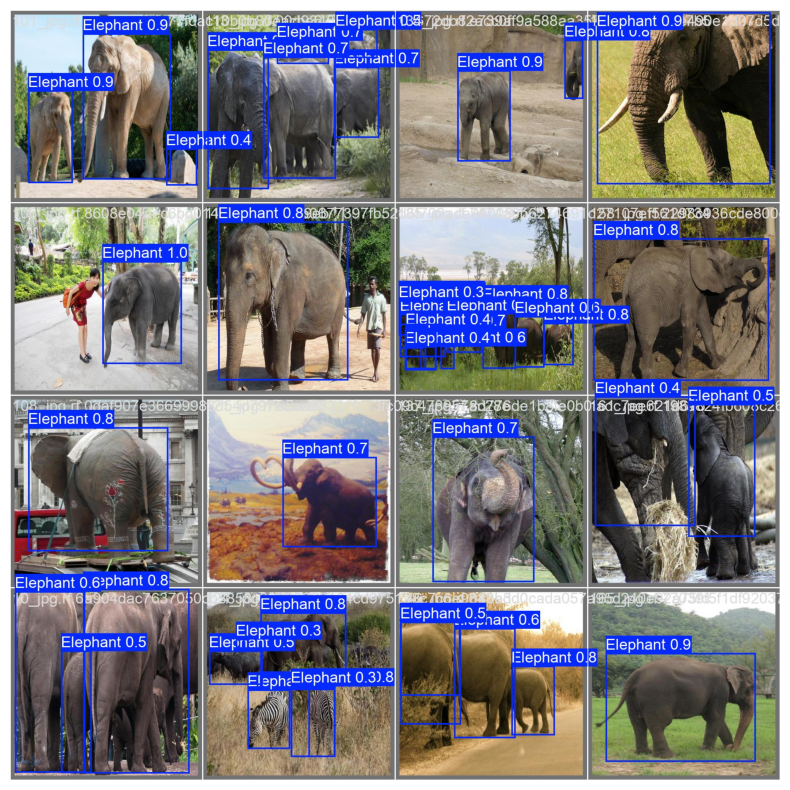

In [ ]:
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
display_image(image_path)

In [ ]:
from google.colab import files
files_path = '/content/runs/detect/train/weights/best.pt'
files.download(files_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

In [ ]:
uploaded = files.upload()
if not uploaded:
  raise FileNotFoundError("No file uploaded")
test_image_path = next(iter(uploaded.keys()))

Saving 26.jpg to 26.jpg


In [ ]:
model_path = "best.pt"
if not os.path.exists(model_path):
  raise FileNotFoundError(f"Model not found at path: {model_path}")
model = YOLO(model_path)

In [ ]:
image = cv2.imread(test_image_path)
if image is None:
  raise FileNotFoundError(f"Image not found at path: {test_image_path}")
  image = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR)
results = model(image)


0: 640x448 1 Elephant, 423.0ms
Speed: 3.5ms preprocess, 423.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
for result in results:
  boxes = result.boxes.cpu().numpy()
  for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    confidence = box.conf[0]
    cls = int(box.cls[0])
    if confidence > 0.5:
      label = f"{model.names[cls]} {confidence:.2f}"
      cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)
      cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

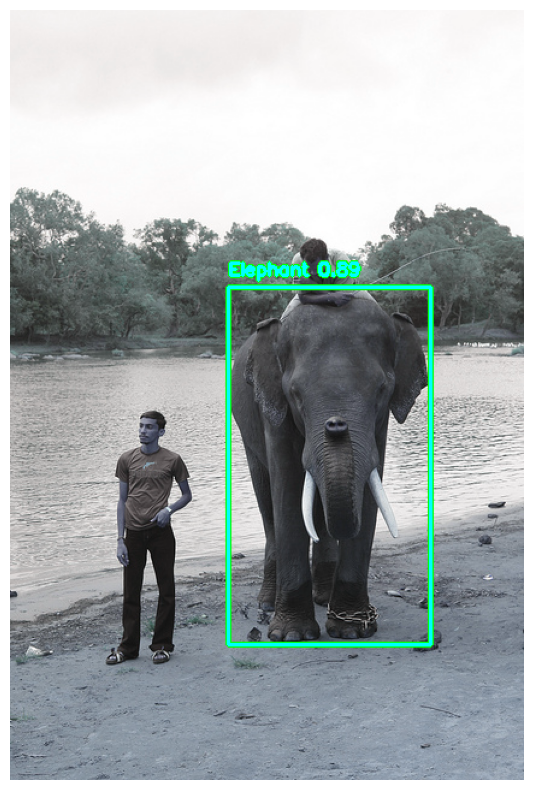

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()